### Weather Type Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/weather_classification_data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [4]:
df.duplicated().sum()

0

#### Temperature (numeric): The temperature in degrees Celsius, ranging from extreme cold to extreme heat.
#### Humidity (numeric): The humidity percentage, including values above 100% to introduce outliers.
#### Wind Speed (numeric): The wind speed in kilometers per hour, with a range including unrealistically high values.
#### Precipitation (%) (numeric): The precipitation percentage, including outlier values.
#### Cloud Cover (categorical): The cloud cover description.
#### Atmospheric Pressure (numeric): The atmospheric pressure in hPa, covering a wide range.
#### UV Index (numeric): The UV index, indicating the strength of ultraviolet radiation.
#### Season (categorical): The season during which the data was recorded.
#### Visibility (km) (numeric): The visibility in kilometers, including very low or very high values.
#### Location (categorical): The type of location where the data was recorded.
#### Weather Type (categorical): The target variable for classification, indicating the weather type.

In [5]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['temperature', 'humidity', 'wind speed', 'precipitation (%)',
       'cloud cover', 'atmospheric pressure', 'uv index', 'season',
       'visibility (km)', 'location', 'weather type'],
      dtype='object')

#### Temperature

In [7]:
print(f"max Temp is:{df.temperature.max()}degrees")
print(f"min Temp is:{df.temperature.min()}degrees")

max Temp is:109.0degrees
min Temp is:-25.0degrees


<Axes: xlabel='temperature', ylabel='Count'>

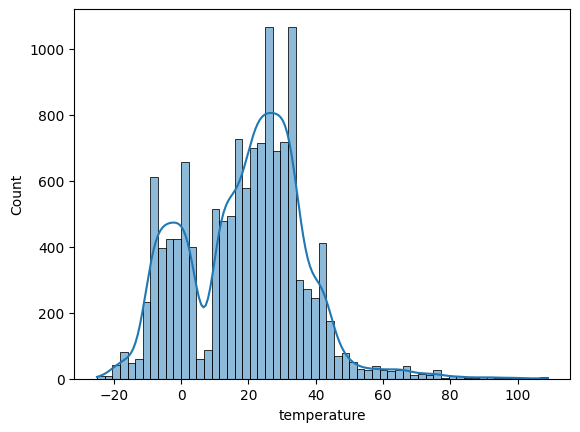

In [8]:
sns.histplot(x=df.temperature,kde=True)

<Axes: xlabel='temperature'>

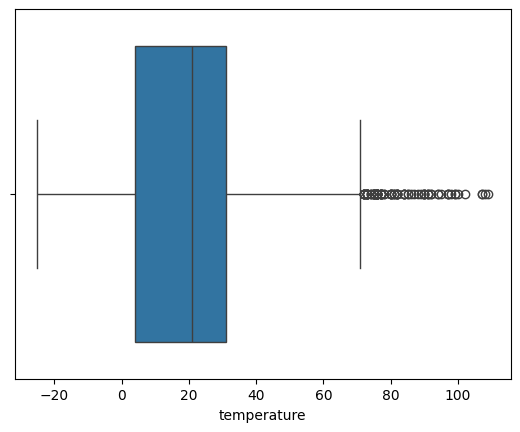

In [9]:
sns.boxplot(x=df.temperature)

#### humidity

<Axes: xlabel='humidity', ylabel='Count'>

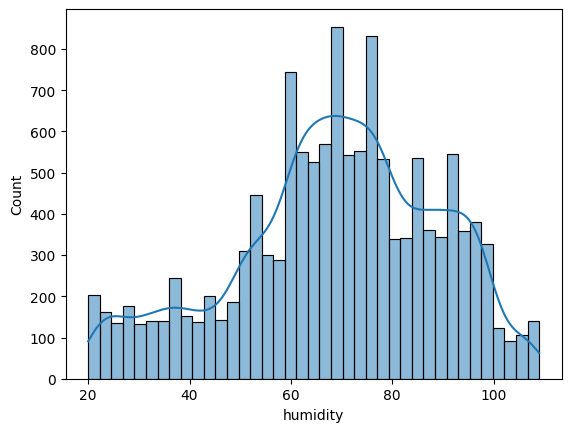

In [10]:
sns.histplot(x=df.humidity,kde=True)

<Axes: xlabel='humidity'>

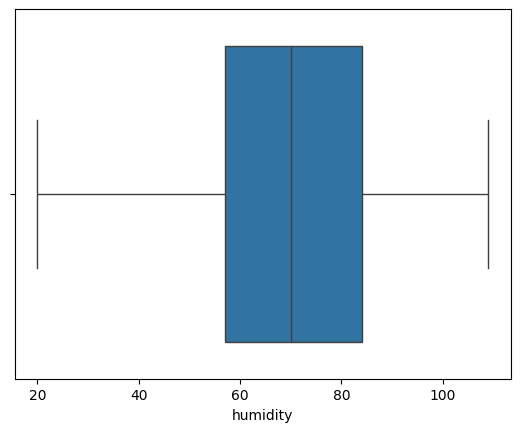

In [11]:
sns.boxplot(x=df.humidity)

In [12]:
df = df[df.humidity <= 100 ]

#### wind speed'

<Axes: xlabel='wind speed', ylabel='Count'>

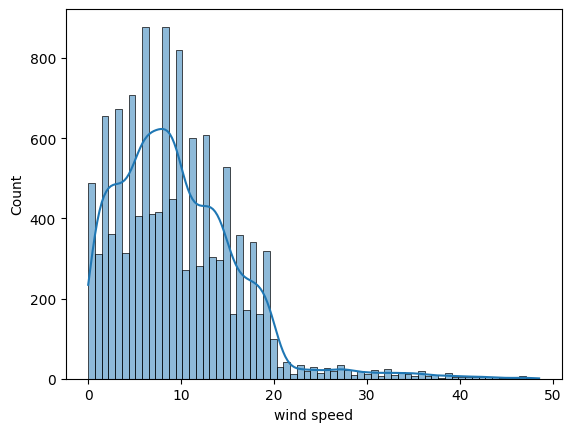

In [13]:
sns.histplot(x=df['wind speed'],kde=True)

<Axes: xlabel='wind speed'>

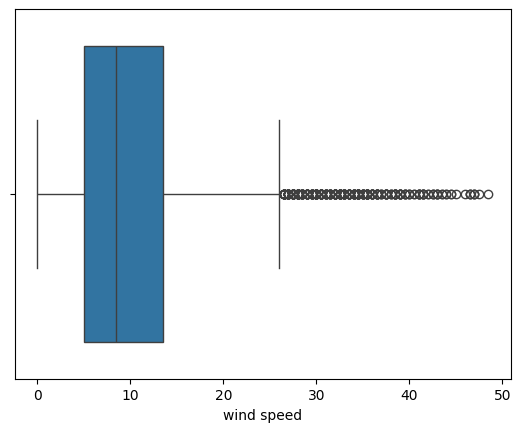

In [14]:
sns.boxplot(x=df['wind speed'])

#### precipitation (%)

<Axes: xlabel='precipitation (%)', ylabel='Count'>

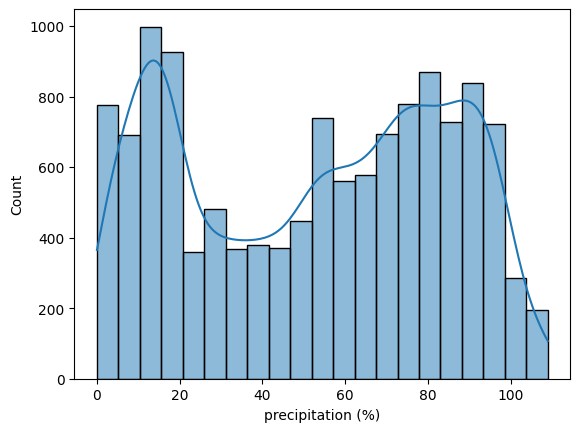

In [15]:
sns.histplot(x=df['precipitation (%)'],kde=True)

<Axes: xlabel='precipitation (%)'>

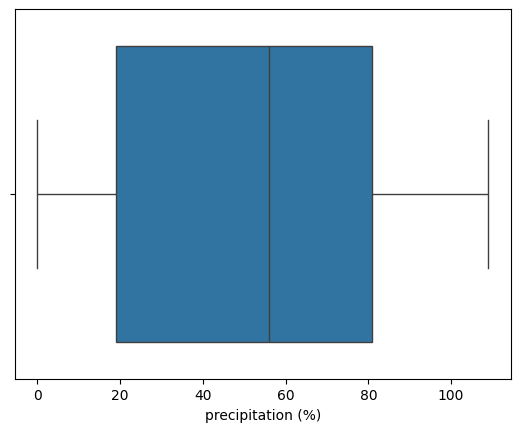

In [16]:
sns.boxplot(x=df['precipitation (%)'])

In [17]:
df = df[df['precipitation (%)'] <= 100]

#### cloud cover

In [18]:
df['cloud cover'].value_counts()

cloud cover
overcast         5751
partly cloudy    4312
clear            2009
cloudy            411
Name: count, dtype: int64

<Axes: xlabel='cloud cover', ylabel='count'>

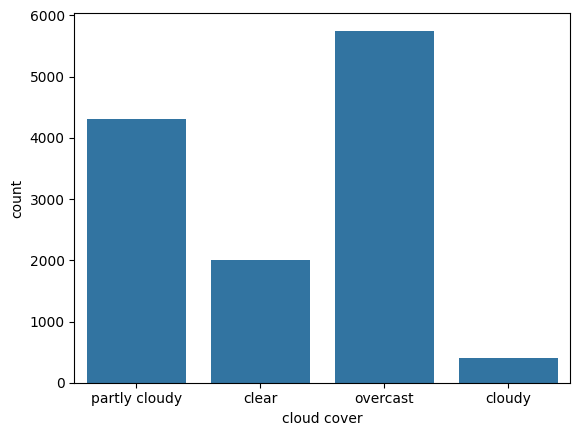

In [19]:
sns.countplot(x=df['cloud cover'])

#### atmospheric pressure

<Axes: xlabel='atmospheric pressure', ylabel='Count'>

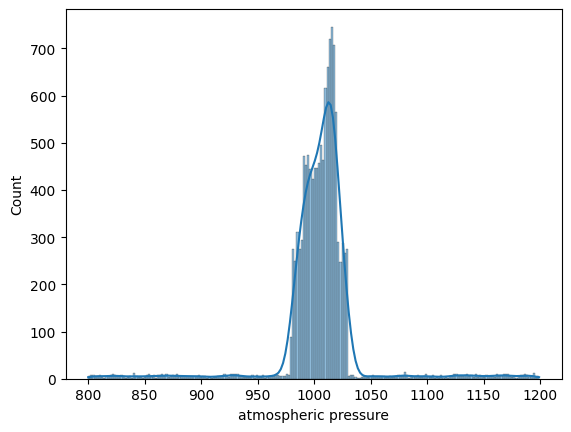

In [20]:
sns.histplot(x=df['atmospheric pressure'],kde=True)

<Axes: xlabel='atmospheric pressure'>

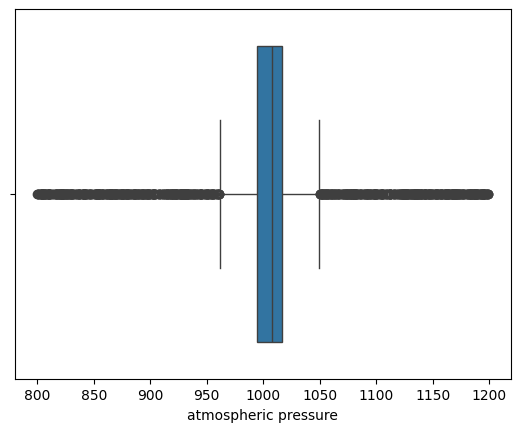

In [21]:
sns.boxplot(x=df['atmospheric pressure'])

#### uv index

<Axes: xlabel='uv index', ylabel='Count'>

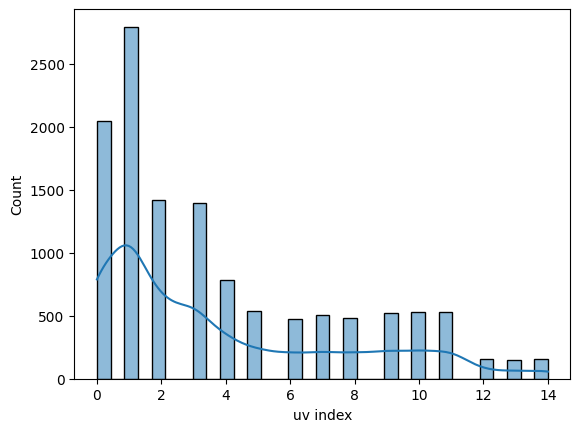

In [22]:
sns.histplot(x=df['uv index'],kde=True)

<Axes: xlabel='uv index'>

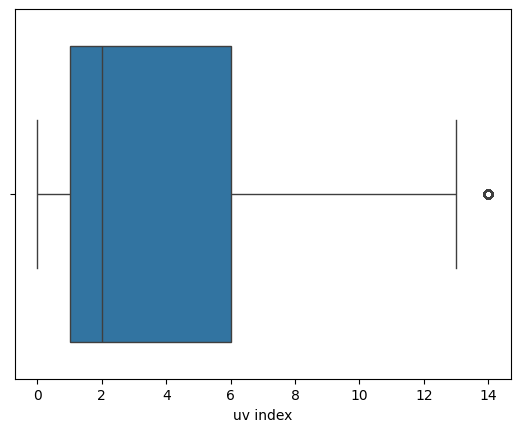

In [23]:
sns.boxplot(x=df['uv index'])

#### season

In [24]:
df.season.value_counts()

season
Winter    5305
Spring    2486
Autumn    2354
Summer    2338
Name: count, dtype: int64

<Axes: xlabel='season', ylabel='count'>

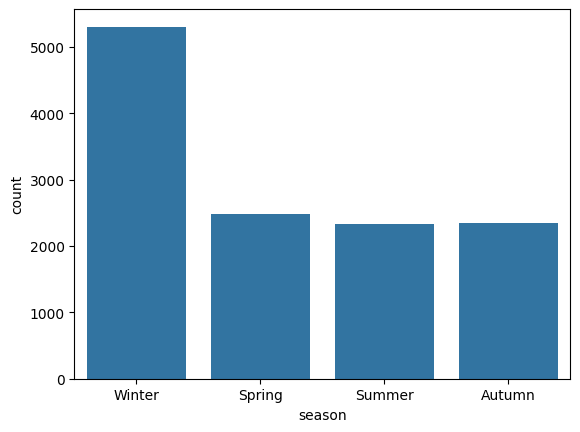

In [25]:
sns.countplot(x=df.season)

#### visibility (km)

<Axes: xlabel='visibility (km)', ylabel='Count'>

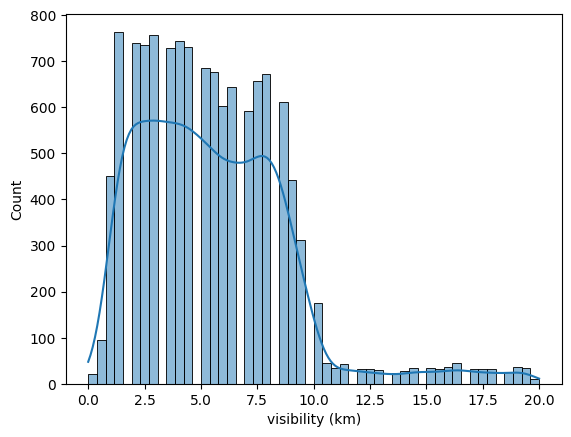

In [26]:
sns.histplot(x=df['visibility (km)'],kde=True)

<Axes: xlabel='visibility (km)', ylabel='Count'>

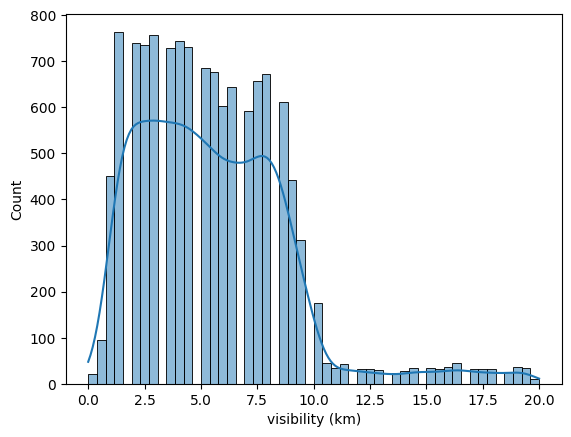

In [27]:
sns.histplot(x=df['visibility (km)'],kde=True)

#### 'location'

In [28]:
df.location.value_counts()

location
mountain    4568
inland      4529
coastal     3386
Name: count, dtype: int64

Text(0.5, 1.0, 'Location')

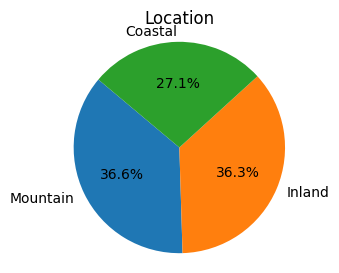

In [29]:
labels = ['Mountain','Inland','Coastal']
sizes = df.location.value_counts()

plt.figure(figsize=(3,3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Location')

####  'weather type'

In [30]:
df['weather type'].value_counts()

weather type
Snowy     3130
Sunny     3124
Rainy     3116
Cloudy    3113
Name: count, dtype: int64

Text(0.5, 1.0, 'Type of weather')

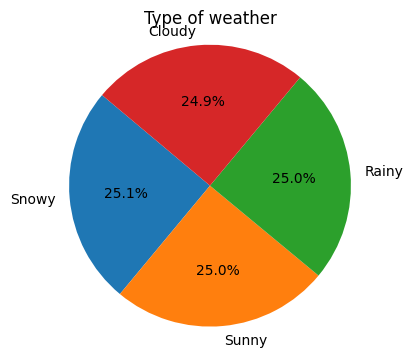

In [31]:
labels = ['Snowy','Sunny','Rainy','Cloudy']
sizes = df['weather type'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Type of weather')

In [32]:
cols_outliers = ['temperature','wind speed','atmospheric pressure','uv index','visibility (km)']
print(f"Shape with outliers; {df.shape}")
for col in cols_outliers:
    upper_bound = df[col].mean() + (2*df[col].std())
    lower_bound = df[col].mean() - (2*df[col].std())
    df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
print(f"Shape without outliers; {df.shape}")

Shape with outliers; (12483, 11)
Shape without outliers; (10357, 11)


In [33]:
df['weather type'] = df['weather type'].map({'Cloudy':0,'Rainy':1,'Sunny':2,'Snowy':3})
df.head()

,temperature,humidity,wind speed,precipitation (%),cloud cover,atmospheric pressure,uv index,season,visibility (km),location,weather type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,1
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,0
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,2
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,2
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,1


In [34]:
one_cols = ['cloud cover','season','location']
scale_cols = ['temperature', 'humidity', 'wind speed', 'precipitation (%)','atmospheric pressure', 'uv index','visibility (km)']

scaler = MinMaxScaler()
onehot = OneHotEncoder()

one_pipe = Pipeline(steps=[
    ('onehot',OneHotEncoder())
])

scale_pipe = Pipeline(steps=[
    ('scaler',MinMaxScaler())
])

preprocessor = ColumnTransformer([
    ('one_pipe',one_pipe,one_cols),
    ('scale_pipe',scale_pipe,scale_cols)
])

In [35]:
X = df.drop('weather type',axis=1)
y = df['weather type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [36]:
models = {
    'Logistic Regression':LogisticRegression(),
    'SVC':SVC(),
    'KNeighbours':KNeighborsClassifier(),
    'Cat Boost':CatBoostClassifier(),
    'XGB':XGBClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),  
}

In [37]:
report = {}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    score = accuracy_score(y_test,prediction)
    report[list(models.keys())[i]] = score
best_score = max(sorted(list(report.values())))
for k,v in report.items():
    if v == best_score:
        best_model_name = k
        break
print(report)
print(f"{best_model_name} is the best model with accuracy of {best_score}")

Learning rate set to 0.087847
0:	learn: 1.1580281	total: 500ms	remaining: 8m 19s
1:	learn: 0.9922147	total: 547ms	remaining: 4m 32s
2:	learn: 0.8631452	total: 572ms	remaining: 3m 10s
3:	learn: 0.7611270	total: 586ms	remaining: 2m 26s
4:	learn: 0.6751965	total: 632ms	remaining: 2m 5s
5:	learn: 0.6039994	total: 653ms	remaining: 1m 48s
6:	learn: 0.5431389	total: 667ms	remaining: 1m 34s
7:	learn: 0.4911199	total: 684ms	remaining: 1m 24s
8:	learn: 0.4466741	total: 693ms	remaining: 1m 16s
9:	learn: 0.4065419	total: 718ms	remaining: 1m 11s
10:	learn: 0.3721572	total: 738ms	remaining: 1m 6s
11:	learn: 0.3415759	total: 755ms	remaining: 1m 2s
12:	learn: 0.3140746	total: 770ms	remaining: 58.5s
13:	learn: 0.2906300	total: 780ms	remaining: 55s
14:	learn: 0.2680574	total: 790ms	remaining: 51.9s
15:	learn: 0.2479955	total: 804ms	remaining: 49.4s
16:	learn: 0.2307277	total: 815ms	remaining: 47.1s
17:	learn: 0.2149692	total: 825ms	remaining: 45s
18:	learn: 0.2003616	total: 837ms	remaining: 43.2s
19:	le

In [38]:
df.head()

,temperature,humidity,wind speed,precipitation (%),cloud cover,atmospheric pressure,uv index,season,visibility (km),location,weather type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,1
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,0
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,2
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,2
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,1


In [39]:
df.to_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/processed_data.csv',index=True)